In [1]:
import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils.metrics import compute_metric, add_to_metrics, columns
import models.VAE as VAE
import utils.visualization as vis
from sklearn.model_selection import train_test_split

import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
save_figures=True
folder_name = 'Smartvote'
data_name = 'Original'
name = '2-Layer'
# name = 'Logistic'
train, test = prep.load_data(folder_name, data_name)
train_users, train_reactions = train
test_users, test_reactions = test
p = 0

method_path = f"../../embeddings/VAE/{folder_name}/{data_name}/{name}"

with open(f'{method_path}/VAE_{p}.pkl', 'rb') as file:
    vae = pickle.load(file)

embedding = pd.DataFrame(vae.embed(prep.impute_dataframe(train_reactions[p]).values),
                         index=train_reactions[p].index, columns=['x','y'])

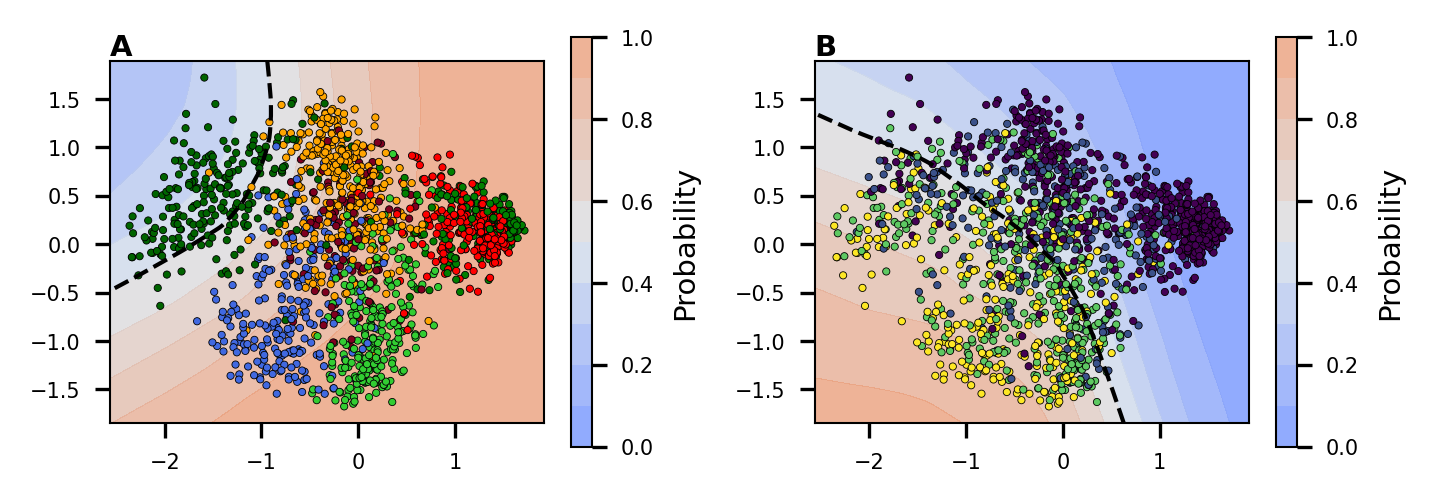

In [3]:
q1, q2 = '27', '13'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(vis.textwidth, .35*vis.textwidth))

ax1 = vis.plotEmbedding(embedding, c=train_users.loc[:,'color'],s=3, ax=ax1)
vis.plotFeature(vae.predict, q1, ax=ax1, cmap=vis.custom_cmap)

ax2 = vis.plotEmbedding(embedding,s=3, c=train_reactions[p].loc[:,q2], ax=ax2)
vis.plotFeature(vae.predict, q2, ax=ax2, cmap=vis.custom_cmap)

if save_figures:
    fig.text(-0,1, 'A', va='bottom', ha='left', weight='bold', transform=ax1.transAxes)
    fig.text(-0,1, 'B', va='bottom', ha='left', weight='bold', transform=ax2.transAxes)
    fig.tight_layout()
    vis.savefig(fig, save_figures, 'ecml-paper', folder_name, data_name, name=f'VAE_{name}_Q{q1}_Q{q2}')
else:
    ax1.set_title(f'VAE with {p}% Missing Values (Question {q})')
    ax2.set_title(f'VAE with {p}% Missing Values (Question {q})')


<Axes: >

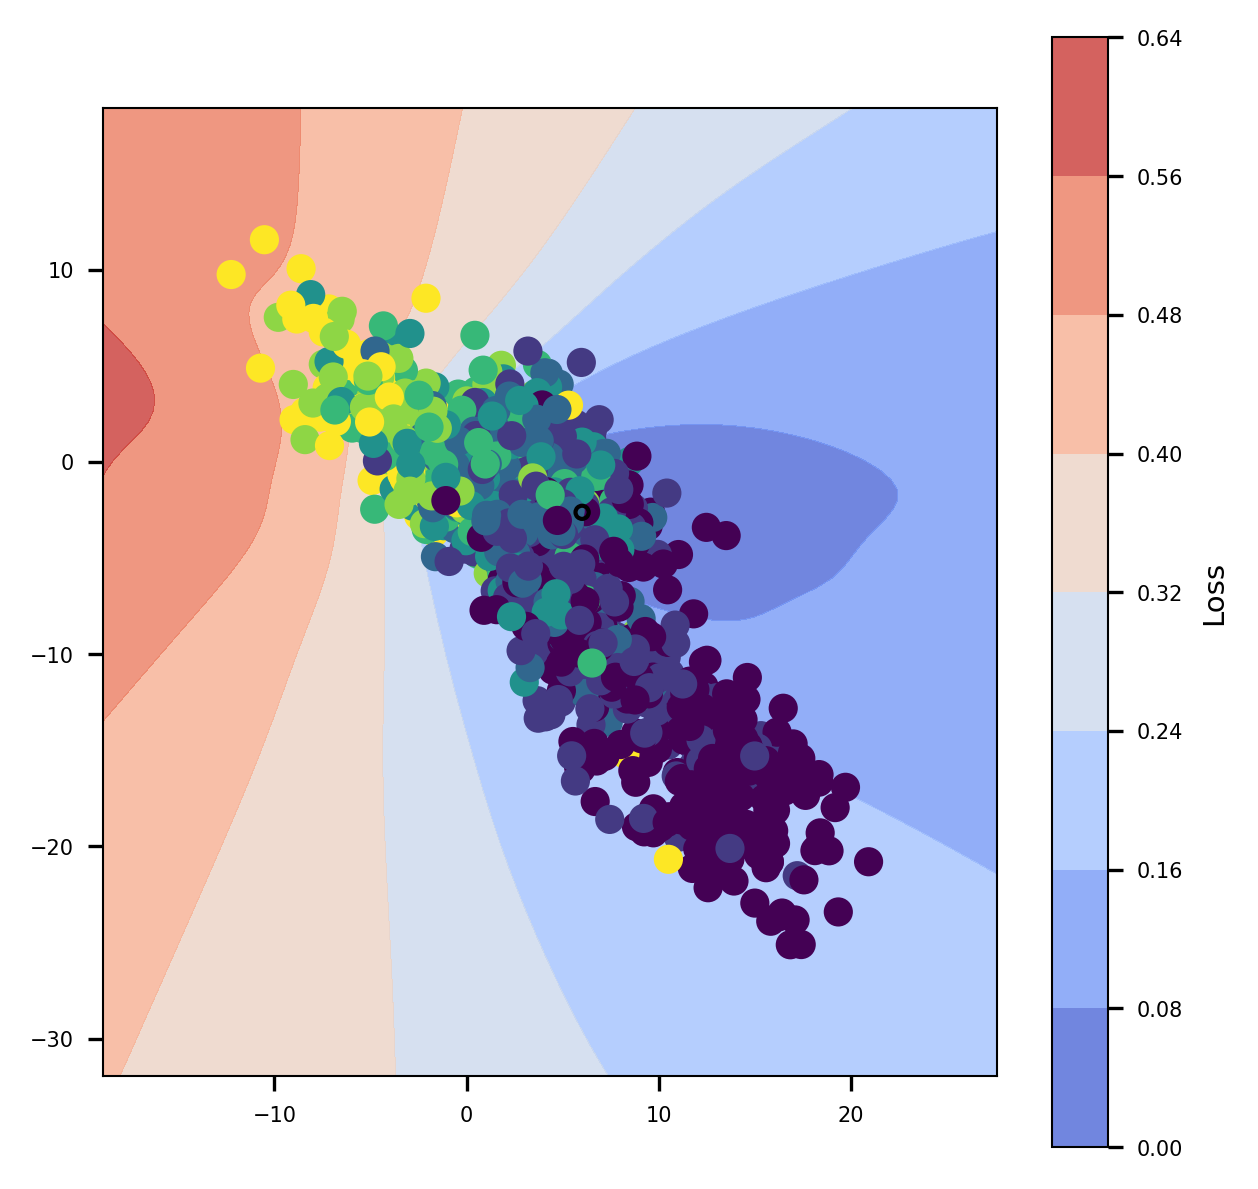

In [18]:
q = '1'
n=22
ax = vis.plotEmbedding(embedding, n=n,c=train_reactions[p].loc[:,q])
user = train_reactions[p].loc[n]
vis.plotObjective(vae.objective, user, ax=ax, d=5)

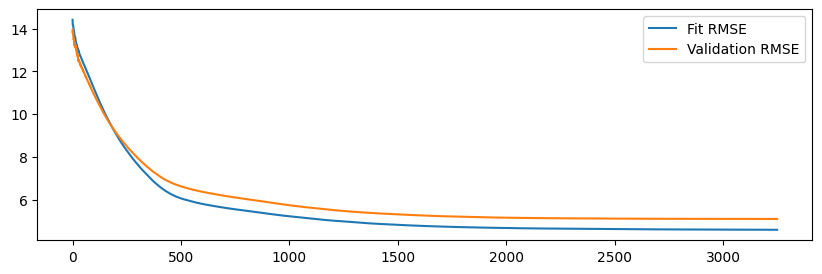

In [14]:
fig, ax = plt.subplots(figsize=(10,3))

ax.plot(vae.train_losses, label='Fit RMSE')
ax.plot(vae.eval_losses, label='Validation RMSE')
_ = ax.legend()

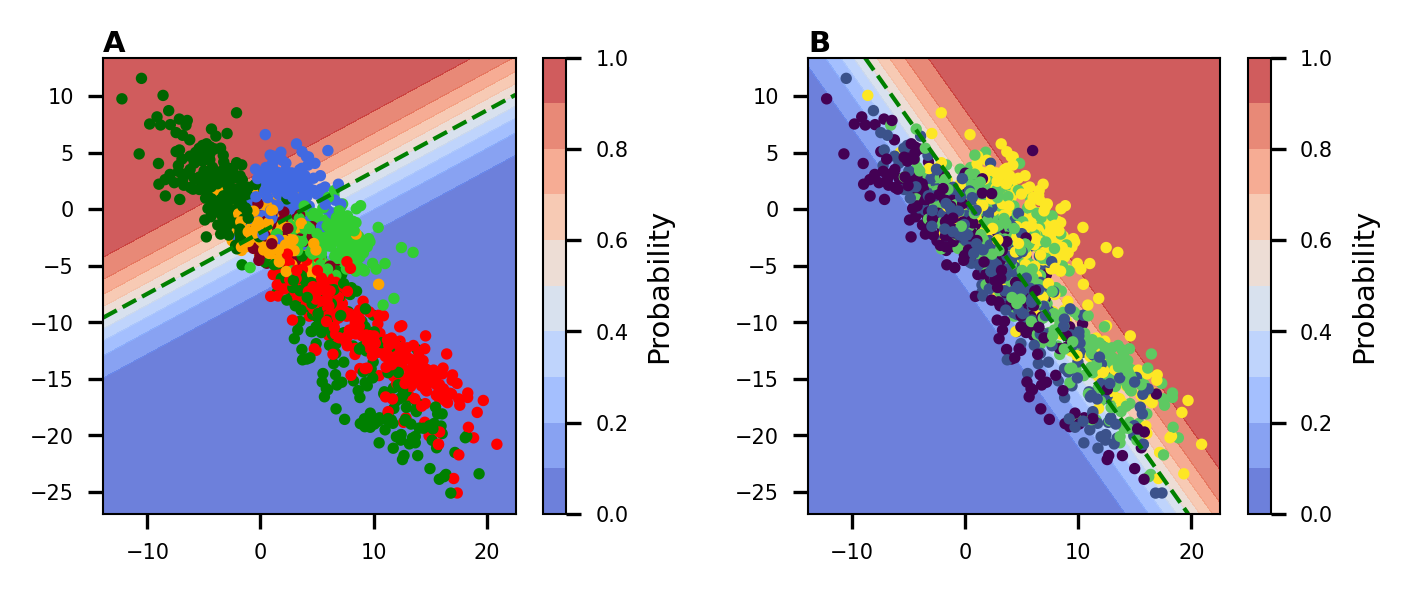

In [19]:
q1, q2 = '46', '28'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(vis.textwidth, .4*vis.textwidth))

ax1 = vis.plotEmbedding(embedding, c=train_users.loc[:,'color'],s=3, ax=ax1)
vis.plotFeature(vae.predict, q1, ax=ax1)

ax2 = vis.plotEmbedding(embedding,s=3, c=train_reactions[p].loc[:,q2], ax=ax2)
vis.plotFeature(vae.predict, q2, ax=ax2)

if save_figures:
    fig.text(-0,1, 'A', va='bottom', ha='left', weight='bold', transform=ax1.transAxes)
    fig.text(-0,1, 'B', va='bottom', ha='left', weight='bold', transform=ax2.transAxes)
    fig.tight_layout()
    vis.savefig(fig, save_figures, 'ecml-paper', folder_name, data_name, name=f'VAE_{name}_Q{q1}_Q{q2}')
else:
    ax1.set_title(f'VAE with {p}% Missing Values (Question {q})')
    ax2.set_title(f'VAE with {p}% Missing Values (Question {q})')